# AIPI 590 - XAI | Assignment #2
### Interpretable ML
### Kayla Haeussler

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://github.com/khaeuss808/AIPI590_InterpretableAI/blob/main/Assignment1.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/khaeuss808/AIPI590_InterpretableAI/blob/main/Assignment1.ipynb)

In [24]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "AIPI590_InterpretableAI" # Change to your repo name
git_path = 'https://github.com/khaeuss808/AIPI590_InterpretableAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'templates'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: ./sample_data: No such file or directory
fatal: destination path 'AIPI590_InterpretableAI' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'AIPI590_InterpretableAI/templates'
/Users/kaylahaeusssler/Documents/XAI/AIPI590_InterpretableAI
AIPI590_InterpretableAI/              README.md
Assignment1.ipynb                     WA_Fn-UseC_-Telco-Customer-Churn.csv


#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [25]:
from google.colab import userdata

userdata.get("secretName")

ModuleNotFoundError: No module named 'google'

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    log_loss,
)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# (1) Exploratory Data Analysis

> Will begin by encoding Churn as 0 and 1, as opposed to current state of Yes and No

In [53]:
print(df.shape)

# Y var
df["Churn"] = [1 if x == "Yes" else 0 for x in df["Churn"]]

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [54]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

> TotalCharges is of type object, but should be numeric. Converting below and also removing the 11 rows that resulted in NaNs

In [55]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df[df["TotalCharges"].isna()]
# df = df.dropna(subset=["TotalCharges"])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


> Encoding categorical variables as is necessary for our future models

In [44]:
# customerID does not contribute value to the model as it is just a unique
#       identifier for customers, so I am dropping that col
df = df.drop(columns=["customerID"])

df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.shape)

(7032, 31)


> Splitting our data into features and output variable, and then splitting into training and test set for use in the following models

In [45]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

(7032, 30)
(7032,)


# (2) Linear Regression

Linear Regression holds the following assumptions (as listed in class slides)
* Linearity
* Independence
* Homoscedasticity
* Normality of Residuals
* No Multicolinearity
* No Autocorrelation

After fitting my Linear Regression model below, I then evaluate if these assumptions are uphelp. I list the name of the assumption and then the corresponding plot/test in an md box.

> Below are evaluate model and residual plotting functions contained in Dr. Bent's notebook regression-interpretability.ipynb on the course GitHub

In [70]:
def evaluate_model_smf_ols(
    X_train, X_test, y_train, y_test, model_name="OLS (statsmodels)"
):
    # Make train DataFrame with target column name
    y_name = y_train.name or "target"
    train_df = X_train.copy()
    train_df[y_name] = y_train.values

    # Build a formula like: target ~ Q("x1") + Q("x2") + ...
    terms = " + ".join([f'Q("{c}")' for c in X_train.columns])
    formula = f"{y_name} ~ {terms}"

    # Fit OLS (formula adds intercept automatically)
    ols_res = smf.ols(formula, data=train_df).fit()

    # Predict on TEST (pass just X_test; intercept handled for you)
    y_pred = ols_res.predict(X_test)

    # Metrics on TEST
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"R2:  {r2:.4f}\n")

    # Compact coefficient table
    coef_tbl = (
        ols_res.params.to_frame("coef")
        .join(ols_res.bse.to_frame("std_err"))
        .join(ols_res.tvalues.to_frame("t"))
        .join(ols_res.pvalues.to_frame("p>|t|"))
    )
    print(coef_tbl)

    # If you want the full classic table:
    # print(ols_res.summary())

    return ols_res, y_pred


ols_res, y_pred = evaluate_model_smf_ols(
    X_train, X_test, y_train, y_test, "OLS (statsmodels)"
)


OLS (statsmodels):
MSE: 0.1459
R2:  0.2522

                                                        coef   std_err  \
Intercept                                           0.329433  0.114862   
Q("gender_Male")[T.True]                           -0.003691  0.009958   
Q("Partner_Yes")[T.True]                            0.007048  0.012059   
Q("Dependents_Yes")[T.True]                        -0.028448  0.012775   
Q("PhoneService_Yes")[T.True]                       0.186079  0.106245   
Q("MultipleLines_No phone service")[T.True]         0.143354  0.016023   
Q("MultipleLines_Yes")[T.True]                      0.068537  0.027261   
Q("InternetService_Fiber optic")[T.True]            0.273538  0.122335   
Q("InternetService_No")[T.True]                    -0.033342  0.017634   
Q("OnlineSecurity_No internet service")[T.True]    -0.033342  0.017634   
Q("OnlineSecurity_Yes")[T.True]                    -0.037186  0.027737   
Q("OnlineBackup_No internet service")[T.True]      -0.033342  0.017

In [46]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")

    return model, y_pred

> I fit and evulate the Linear Regression model below, using the evaluate_model function defined above

In [47]:
lr_model, lr_pred = evaluate_model(
    LinearRegression(), X_train, X_test, y_train, y_test, "Linear Regression"
)


Linear Regression:
MSE: 0.15
R2 Score: 0.25
SeniorCitizen: 0.0546
tenure: -0.0019
MonthlyCharges: -0.0037
TotalCharges: -0.0000
gender_Male: -0.0037
Partner_Yes: 0.0070
Dependents_Yes: -0.0284
PhoneService_Yes: 0.0214
MultipleLines_No phone service: -0.0214
MultipleLines_Yes: 0.0685
InternetService_Fiber optic: 0.2735
InternetService_No: -0.0333
OnlineSecurity_No internet service: -0.0333
OnlineSecurity_Yes: -0.0372
OnlineBackup_No internet service: -0.0333
OnlineBackup_Yes: 0.0076
DeviceProtection_No internet service: -0.0333
DeviceProtection_Yes: 0.0215
TechSupport_No internet service: -0.0333
TechSupport_Yes: -0.0380
StreamingTV_No internet service: -0.0333
StreamingTV_Yes: 0.0921
StreamingMovies_No internet service: -0.0333
StreamingMovies_Yes: 0.0953
Contract_One year: -0.1167
Contract_Two year: -0.0746
PaperlessBilling_Yes: 0.0359
PaymentMethod_Credit card (automatic): -0.0095
PaymentMethod_Electronic check: 0.0623
PaymentMethod_Mailed check: -0.0064


### Linearity & Homoscedasticity: Residuals vs Fitted Plot

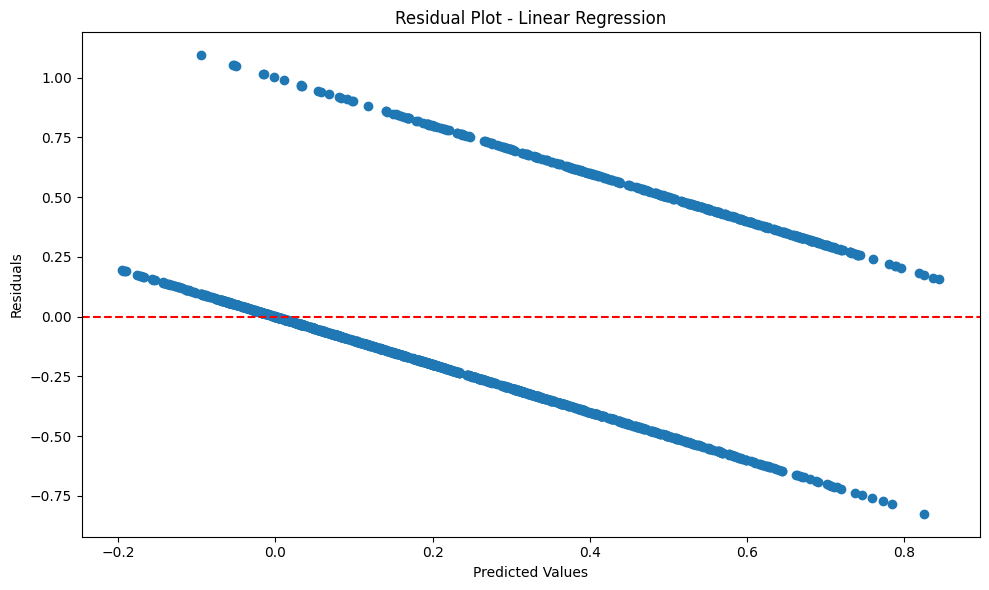

In [48]:
# Residual Plot: from Dr. Bent's notebook
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot - {model_name}")
    plt.axhline(y=0, color="r", linestyle="--")
    plt.tight_layout()
    plt.show()


plot_residuals(y_test, lr_pred, "Linear Regression")

### Normality of Residuals: QQ Plot

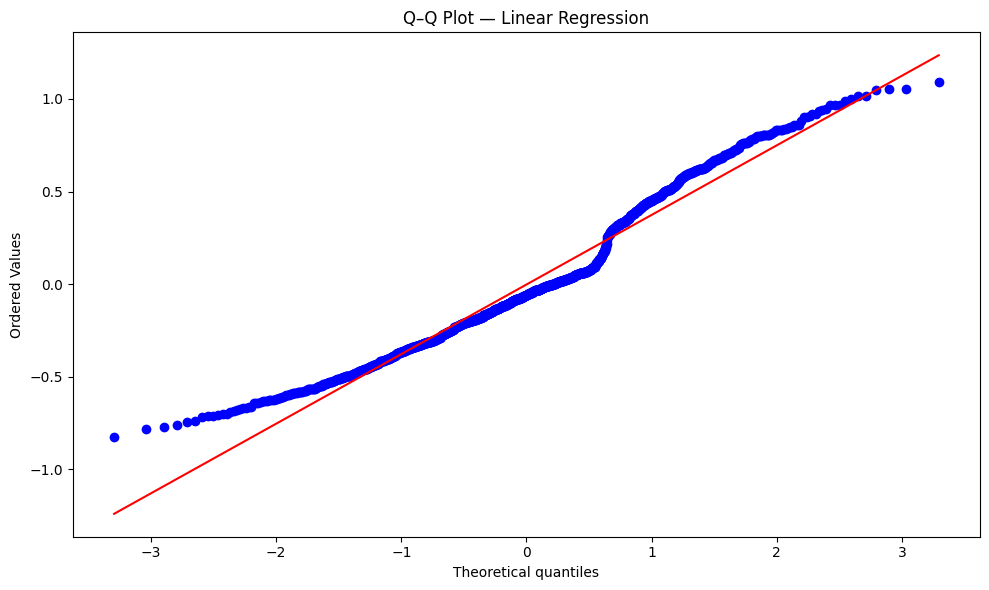

In [66]:
residuals = y_test - lr_pred
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title(f"Q–Q Plot — Linear Regression")
plt.tight_layout()
plt.show()

### Multicollinearity: VIF

In [75]:
# ChatGPT was used to generate this block of code
Xv = X_train.select_dtypes(include=[np.number]).astype(float)  # ensure numeric
Xv = sm.add_constant(Xv, has_constant="add")  # add intercept

vif = pd.Series(
    [
        variance_inflation_factor(Xv.values, i) for i in range(1, Xv.shape[1])
    ],  # skip intercept (col 0)
    index=Xv.columns[1:],  # names without intercept
    name="VIF",
).sort_values(ascending=False)

print(vif)
print("\nVIF > 5:\n", vif[vif > 5])

TotalCharges      9.420544
tenure            5.778620
MonthlyCharges    3.280735
SeniorCitizen     1.052864
Name: VIF, dtype: float64

VIF > 5:
 TotalCharges    9.420544
tenure          5.778620
Name: VIF, dtype: float64


### Autocorrelation: Durbin Watson Test

# (3) Logistic Regression

In [50]:
log_model, log_pred = evaluate_model(
    LogisticRegression(), X_train, X_test, y_train, y_test, "Logistic Regression"
)


Logistic Regression:
MSE: 0.21
R2 Score: -0.10


/Users/kaylahaeusssler/miniforge3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: unsupported format string passed to numpy.ndarray.__format__

# (4) Generalized Additive Model

# (5) Model Comparison